# This Script includes:
### 1. Import Libraries and Data
### 2. Data cleaning
### 3. Visualizing variables for potential analysis
### 4. Regression analysis
#### 4.1 Compare how the regression fits the training set
### 5. Reflections on the impact of possible data bias

# Import Libraries and Data

In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Import DataFrame 
# Create a path 
path = r'/Users/amritkaur/Desktop/CF Data Immersion/Chapter 6/'
df = pd.read_csv(os.path.join(path, 'Task 6.4/us_retail_forecast.csv'))

/var/folders/b2/nhtg2py55bd6x9ky11p928r00000gn/T/ipykernel_1201/3495754776.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Task 6.4/us_retail_forecast.csv'))


In [41]:
df.head(9800)

,Unnamed: 0,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,State
0,0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Kentucky
1,1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Kentucky
2,2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,California
3,3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Florida
4,4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9795,2022-04-08,S005,P0016,Clothing,East,86,13,179,11.90,24.20,20,Snowy,0,23.36,Winter,Illinois
9796,9796,2022-04-08,S005,P0017,Electronics,North,447,327,196,344.54,46.40,15,Rainy,0,45.23,Winter,Ohio
9797,9797,2022-04-08,S005,P0018,Electronics,North,211,124,140,123.21,30.44,20,Snowy,0,32.07,Summer,Ohio
9798,9798,2022-04-08,S005,P0019,Electronics,West,240,125,197,136.68,11.76,15,Cloudy,1,9.80,Autumn,Ohio


In [42]:
# Create a sample dataset of approx 10,000 data to get clear insights
df_sub = df[1:5000]

In [43]:
df_sub.shape

(4999, 17)

In [44]:
df_sub.head()

,Unnamed: 0,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,State
1,1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Kentucky
2,2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,California
3,3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Florida
4,4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Florida
5,5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter,California


## Data Cleaning

In [46]:
df_sub.columns

Index(['Unnamed: 0', 'Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'State'],
      dtype='object')

In [47]:
df_sub.columns

Index(['Unnamed: 0', 'Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'State'],
      dtype='object')

In [48]:
df_sub.dtypes

Unnamed: 0              int64
Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
State                  object
dtype: object

In [49]:
df_sub.describe()

,Unnamed: 0,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,273.055411,136.837968,110.810162,141.919472,55.141734,9.958992,0.504701,55.194711
std,1443.231328,131.049178,108.470728,52.294616,108.962711,25.938261,7.051468,0.500028,26.099684
min,1.000000,50.000000,0.000000,20.000000,-8.870000,10.010000,0.000000,0.000000,5.340000
25%,1250.500000,157.000000,49.000000,66.000000,53.360000,32.495000,5.000000,0.000000,32.365000
50%,2500.000000,272.000000,108.000000,112.000000,113.240000,55.140000,10.000000,1.000000,55.330000
75%,3749.500000,387.000000,200.000000,156.000000,206.930000,78.000000,15.000000,1.000000,78.350000
max,4999.000000,500.000000,489.000000,200.000000,506.370000,99.920000,20.000000,1.000000,104.570000


In [50]:
# Check for null values
print(df_sub.isnull().sum())

Unnamed: 0            0
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
State                 0
dtype: int64


In [51]:
df_sub.shape

(4999, 17)

In [52]:
df_sub.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4999, dtype: bool

/var/folders/b2/nhtg2py55bd6x9ky11p928r00000gn/T/ipykernel_1201/776574866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['Units Sold'], bins=25)


<Axes: xlabel='Units Sold', ylabel='Density'>

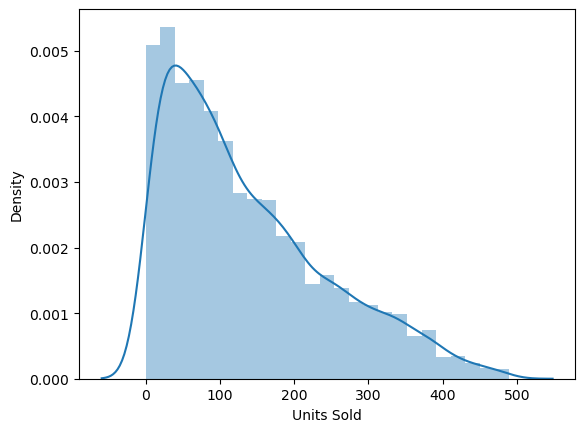

In [53]:
# Extreme value check
sns.distplot(df_sub['Units Sold'], bins=25)

## Visualizing variables for potential analysis

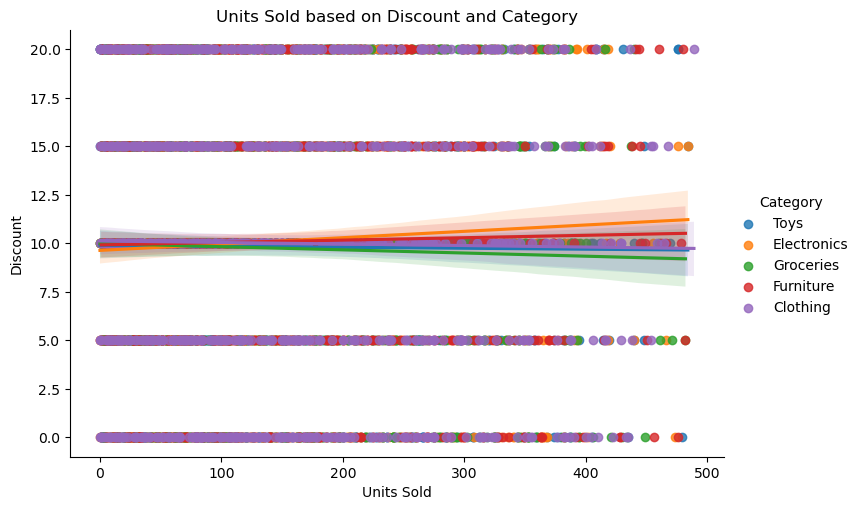

In [55]:
# Create a Scatterplot of variables to analyze
sns.lmplot(data= df_sub, x="Units Sold", y="Discount", hue="Category", aspect=1.5)

plt.title("Units Sold based on Discount and Category")
plt.show()

### Hypothesis : If the discount on units rises, then sale of specific units also rises.

## Regression Analysis

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sub['Discount'].values.reshape(-1,1)
y = df_sub['Units Sold'].values.reshape(-1,1)

In [59]:
X

array([[20],
       [10],
       [10],
       ...,
       [ 0],
       [20],
       [10]])

In [60]:
y

array([[150],
       [ 65],
       [ 61],
       ...,
       [ 85],
       [221],
       [462]])

In [61]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
# Create a regression object.
regression = LinearRegression() 

In [63]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

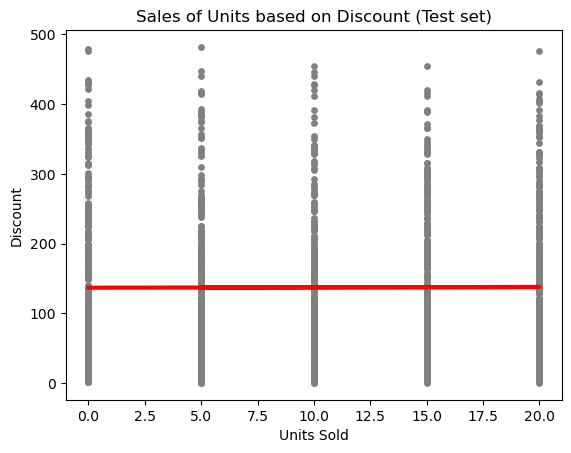

In [65]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales of Units based on Discount (Test set)')
plot_test.xlabel('Units Sold')
plot_test.ylabel('Discount')
plot_test.show()

### Insights from above Scatter Plot:
#### 1. The plot shows the number of units sold (X-axis) against the discount (Y-axis). Data points are distributed vertically at specific unit values (e.g., 0, 5, 10, 15, 20), indicating sales occur in fixed quantities.
#### 2. The thick red horizontal line around Discount = 100 suggests a significant data point or threshold. It could represent a standard discount level or an anomaly in the dataset.
#### 3. Some data points extend above 300 on the Y-axis, indicating extremely high discounts. The presence of many scattered points suggests variations in discounting strategies.
#### In order to analyze further, we need to identify why sales occur at specific unit values (e.g., batch sales, promotions). Investigate the significance of the 100-discount threshold. Analyze if higher discounts consistently lead to more units sold.

In [67]:
# Creating objects that contain the model summary statistics
rmse_1 = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2_1 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [68]:
# Print the model summary statistics. This is where we evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.0506059]]
Mean squared error:  11628.848710406537
R2 score:  -2.459611950333951e-05


In [69]:
y_predicted

array([[136.61542507],
       [137.37451355],
       [137.12148405],
       ...,
       [137.12148405],
       [136.86845456],
       [136.86845456]])

In [70]:
# Create a dataframe comparing the actual and predicted values of y.
data_1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_1.head(20)

,Actual,Predicted
0,238,136.615425
1,26,137.374514
2,50,137.121484
3,237,137.374514
4,127,136.615425
5,35,137.374514
6,33,137.121484
7,7,137.374514
8,213,136.868455
9,31,136.615425


##### The predicted values in the dataset remain clustered around 136.6 to 137.4, while the actual values range significantly from 2 to 291. This suggests that the model is underfitting the data, likely predicting a near-constant mean or median value instead of capturing any underlying patterns. The big difference between actual and predicted values indicate high error, which could result in a high Mean Squared Error (MSE) and low R² score. Such poor predictive performance often arises from an overly simplistic model, inadequate feature selection, or insufficient training data. To improve accuracy, it is essential to evaluate model complexity, incorporate better features, and explore more sophisticated algorithms like decision trees, ensemble methods, or neural networks. 

## Compare how the regression fits the training set

In [73]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0506059]]
Mean squared error:  11821.020524362913
R2 score:  1.0686344283250548e-05


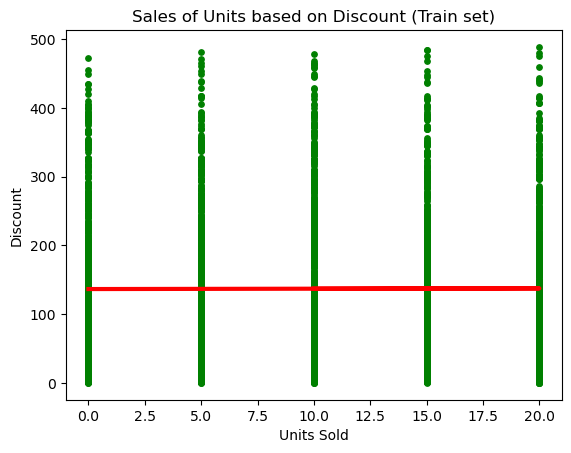

In [76]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales of Units based on Discount (Train set)')
plot_test.xlabel('Units Sold')
plot_test.ylabel('Discount')
plot_test.show()

#### The scatter plot illustrates the relationship between units sold (X-axis) and discount (Y-axis) for the training dataset. The data points are aligned vertically at specific unit values (e.g., 0, 5, 10, 15, 20), suggesting that sales are typically made in fixed quantities rather than spread continuously. This pattern may indicate bulk purchasing behavior or pre-defined sales packages. Additionally, the red horizontal line at approximately 125–150 on the discount scale suggests a threshold or a commonly applied discount level. The vertical spread of data points indicates that for the same number of units sold, different discount values are applied, implying variability in pricing strategies. However, the clustering at fixed unit intervals may indicate that additional features are needed to explain variations in discounting. Further investigation into price elasticity, customer segmentation, or seasonal trends could help understand the factors influencing discount levels.

In [78]:
# Create a dataframe comparing the actual and predicted values of y.
data_2 = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data_2.head(30)

,Actual,Predicted
0,56,136.615425
1,14,137.627543
2,325,136.615425
3,29,137.627543
4,270,136.615425
5,53,137.374514
6,114,137.374514
7,96,136.615425
8,162,137.627543
9,34,137.627543


#### The actual vs. predicted values indicate that the model is failing to capture variability in the data. The actual values range widely from 14 to 380, yet the predicted values remain clustered between 136.6 and 137.6, suggesting that the model is overly simplistic and likely underfitting the data. This pattern implies that the model might be relying on a central tendency (mean or median) rather than identifying meaningful patterns or relationships. As a result, predictions for lower actual values (e.g., 14, 19, 26) are significantly overestimated, while higher actual values (e.g., 270, 298, 380) are severely underestimated. This could lead to high Mean Squared Error (MSE) and low R² scores, indicating poor predictive performance. To improve accuracy, it may be beneficial to enhance feature selection, try more complex models (e.g., decision trees or neural networks), and analyze residual errors to understand what factors the model is missing. Further tuning of hyperparameters and testing alternative regression techniques could also help improve prediction quality.

## Reflections on the impact of possible data bias:
#### The fact that the model predicts values tightly clustered around a narrow range points to a possible bias in how the data is represented or how the model is trained. One potential source of bias could be that the dataset is dominated by certain patterns or outliers that the model fails to capture, leading it to rely on assumptions like the mean or median. This could be indicative of an underlying imbalance in the dataset, where certain ranges of values are underrepresented or not sufficiently emphasized during training, leading to poor generalization across the data. Furthermore, the variability in discounts for the same units sold points to possible inconsistency or bias in the pricing strategies, perhaps influenced by factors like customer negotiation power, sales representative discretion, or regional price variations. This suggests that the dataset may not fully capture all the variations of pricing decisions, and there might be external factors or hidden variables that are influencing the discounts in ways not reflected by the unit-sales relationship alone.

In [81]:
# Export data 
df.to_csv(os.path.join(path, 'Task 6.5', 'us_retail_forecast_cleaned.csv'))

OSError: Cannot save file into a non-existent directory: '/Users/amritkaur/Desktop/CF Data Immersion/Chapter 6/Task 6.5'